In [5]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
sleep = pd.read_stata('sleep75.dta')
pd.options.display.max_columns = sleep.shape[1]  # Display all rows
sleep.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,leis2,leis3,smsa,lhrwage,lothinc,male,marr,prot,rlxall,selfe,sleep,slpnaps,south,spsepay,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32.0,0.0,1.0,0.0,0.0,12.0,0.0,0.0,1.0,3529.0,3479.0,3479.0,0.0,1.955861,10.075380,1.0,1.0,1.0,3163.0,0.0,3113.0,3163.0,0.0,0.0,0.0,3438.0,0.0,3438.0,0.0,14.0,0.0,13.0,7.070004,1024.0
1,31.0,0.0,2.0,0.0,0.0,14.0,9500.0,1.0,1.0,2140.0,2140.0,2140.0,0.0,0.357674,0.000000,1.0,0.0,1.0,2920.0,1.0,2920.0,2920.0,1.0,0.0,0.0,5020.0,0.0,5020.0,0.0,11.0,0.0,0.0,1.429999,961.0
2,44.0,0.0,3.0,0.0,0.0,17.0,42500.0,1.0,1.0,4595.0,4505.0,4227.0,1.0,3.021887,0.000000,1.0,1.0,0.0,3038.0,1.0,2670.0,2760.0,0.0,20000.0,1.0,2815.0,0.0,2815.0,0.0,21.0,0.0,0.0,20.530001,1936.0
3,30.0,0.0,4.0,0.0,0.0,12.0,42500.0,1.0,1.0,3211.0,3211.0,3211.0,0.0,2.263844,0.000000,0.0,1.0,1.0,3083.0,1.0,3083.0,3083.0,0.0,5000.0,1.0,3786.0,0.0,3786.0,0.0,12.0,0.0,12.0,9.619998,900.0
4,64.0,0.0,5.0,0.0,0.0,14.0,2500.0,1.0,1.0,4052.0,4007.0,4007.0,0.0,1.011601,9.328213,1.0,1.0,1.0,3493.0,0.0,3448.0,3493.0,0.0,2400.0,1.0,2580.0,0.0,2580.0,0.0,44.0,0.0,33.0,2.750000,4096.0


# [pandas.read_stata](https://pandas.pydata.org/docs/reference/api/pandas.read_stata.html)

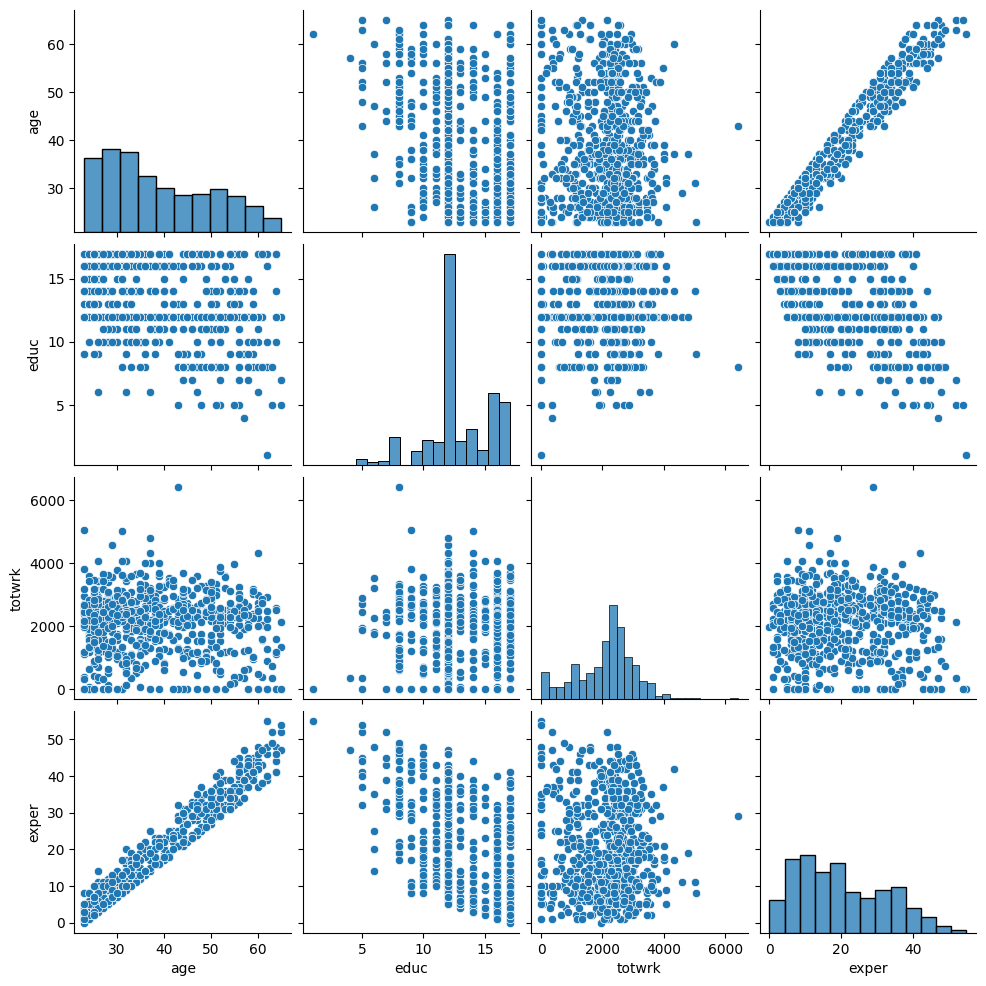

In [7]:
# Display pairplots
sns.pairplot(sleep[['age', 'educ', 'totwrk', 'exper']]);

There is high correlation between age and work experience (in years)

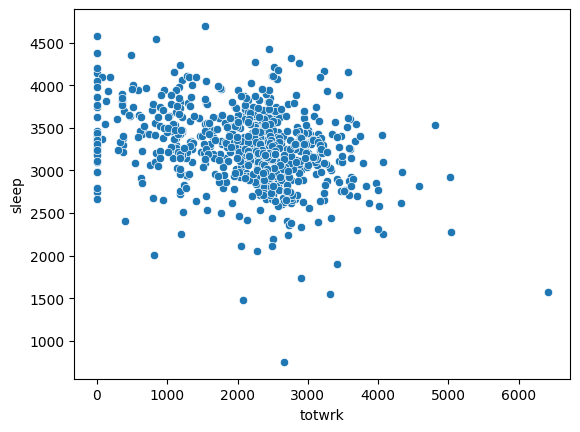

In [8]:
# Display correlation between totwrk and sleep
sns.scatterplot(data=sleep, x='totwrk', y='sleep');

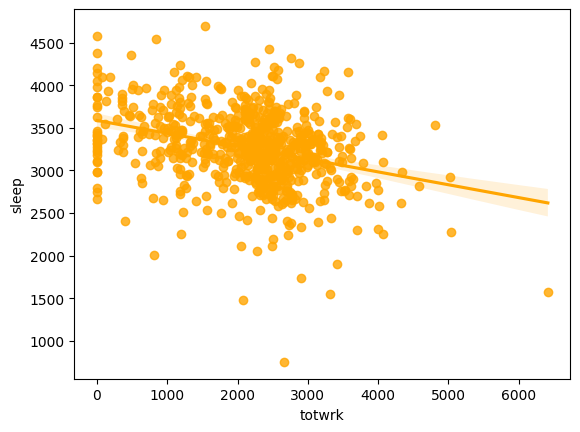

In [12]:
# Display line correlation
sns.regplot(data=sleep, x='totwrk', y='sleep', color='orange');

# [Fitting models using R-style formulas](https://www.statsmodels.org/stable/example_formulas.html)

In [19]:
# Train model
model = smf.ols(formula='sleep ~ totwrk + age + educ', data=sleep).fit()
model.params

Intercept    3638.245312
totwrk         -0.148373
age             2.199885
educ          -11.133813
dtype: float64

In [20]:
# Display summary of Regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     29.92
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.28e-18
Time:                        13:08:52   Log-Likelihood:                -5263.1
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     702   BIC:                         1.055e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3638.2453    112.275     32.405      0.0

In [22]:
# Describe main statistical values
print(f'TSS: {model.centered_tss:.3f}, RSS: {model.ssr:.3f}, ESS: {model.ess:.3f}, R2: {model.rsquared:.3f}')

TSS: 139239835.763, RSS: 123455057.153, ESS: 15784778.610, R2: 0.113


In [26]:
# Main part of summary
print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3638.2453    112.275     32.405      0.000    3417.810    3858.681
totwrk        -0.1484      0.017     -8.888      0.000      -0.181      -0.116
age            2.1999      1.446      1.522      0.129      -0.639       5.038
educ         -11.1338      5.885     -1.892      0.059     -22.687       0.420


In [27]:
# Display residials
model.resid

0       48.072011
1      114.266300
2     -458.094193
3       74.105737
4      207.638913
          ...    
701   -318.029786
702     18.448806
703    198.603941
704   -306.803957
705   -205.494413
Length: 706, dtype: float64